<a href="https://colab.research.google.com/github/shreyaa-chax05/salary_vs_expectation/blob/main/salary_vs_expectation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
ds=pd.read_csv('/content/sample_data/Experience-Salary.csv')

In [3]:
ds.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
# dependent feature
y=ds.iloc[:,1]
y

,salary(in thousands)
0,16.521825
1,11.666234
2,23.167255
3,20.877145
4,23.166236
...,...
995,24.666502
996,24.160270
997,19.903797
998,21.974413


In [5]:
# independent feature
x=ds.iloc[:,0]
x

,exp(in months)
0,18.290293
1,17.023407
2,26.343613
3,19.105834
4,27.742516
...,...
995,22.161741
996,32.266497
997,17.039030
998,25.222124


# Linear Regression

In [6]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from numpy._core.fromnumeric import mean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr= LinearRegression()
mse=cross_val_score(lr,x.values.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=5)
mean_mse=mean(mse)
print( mean_mse)

-26.860867756471784


In [8]:
# ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-3,1e-2,5,8,10,111,100,120,500]}

In [9]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x.values.reshape(-1,1),y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 5, 8, 10, 111,
                                   100, 120, 500]},
             scoring='neg_mean_squared_error')

In [10]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-26.860867756471784


In [11]:
# lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-3,1e-2,2,5,10,20,30,35,40,100,200]}

In [12]:
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x.values.reshape(-1,1),y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.009e+03, tolerance: 6.119e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.293e+03, tolerance: 6.271e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.463e+03, tolerance: 6.175e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 2, 5, 10, 20, 30,
                                   35, 40, 100, 200]},
             scoring='neg_mean_squared_error')

In [13]:
lasso_regressor.best_params_
lasso_regressor.best_score_

np.float64(-26.860867756471784)

#Comparision of the predicted result

In [22]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Salary')

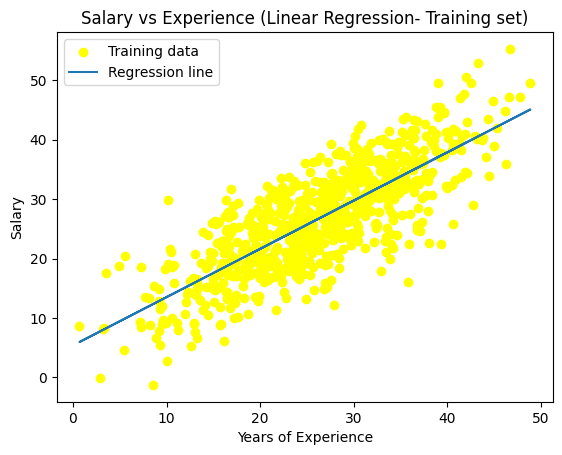

In [21]:
plt.scatter(x_train, y_train, label="Training data",color='yellow')
plt.plot(x_train, lr.predict(x_train.values.reshape(-1,1)), label="Regression line")
plt.legend()
plt.title('Salary vs Experience (Linear Regression- Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

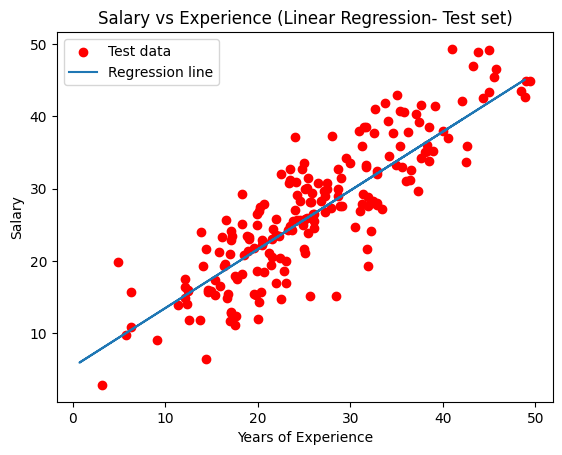

In [24]:
# Training set vs Test set
plt.scatter(x_test, y_test, label="Test data",color='red')
plt.plot(x_train, lr.predict(x_train.values.reshape(-1,1)), label="Regression line")
plt.legend()
plt.title('Salary vs Experience (Linear Regression- Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')